# Tópicos Avanzados de Estadística

## Tarea: Regresión y clasificación

### Presentado por:
- Miguel Ángel Quintero

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### 1. Clasificación: cáncer de seno

In [2]:
df_cl = pd.read_csv('Breast_cancer.csv')

In [3]:
df_cl = df_cl.dropna(axis=1)
df_cl.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
X = df_cl.drop('diagnosis',axis=1).values
y = df_cl['diagnosis'].values
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Inicializando la red neuronal
model_cl = Sequential()

# añadiendo capa de entrada y de salida
model_cl.add(Dense(32, activation='relu', input_dim=len(X.T)))
model_cl.add(Dense(1, activation='sigmoid'))
model_cl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model_cl.fit(X_train, y_train, batch_size=100, epochs=30)
y_pred = model_cl.predict(X_test)

Epoch 1/30
5/5 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.6871
Epoch 2/30
5/5 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.7548
Epoch 3/30
5/5 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.8038
Epoch 4/30
5/5 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8518
Epoch 5/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8733
Epoch 6/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8801
Epoch 7/30
5/5 [==============================] - 0s 3ms/step - loss: 0.2658 - accuracy: 0.9136
Epoch 8/30
5/5 [==============================] - 0s 3ms/step - loss: 0.2550 - accuracy: 0.9215
Epoch 9/30
5/5 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9309
Epoch 10/30
5/5 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9367
Epoch 11/30
5/5 [======================

In [8]:
y_pred = model_cl.predict(X_test)
cr = classification_report(y_test, (y_pred> 0.5))
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



### 2. Regresión: precio de viviendas

In [9]:
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
df_rg = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df_rg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df_rg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
X = df_rg.values
y = boston_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model_rg = Sequential()

# añadiendo capa de entrada y de salida
model_rg.add(Dense(32, activation='relu', input_dim=len(X.T)))
model_rg.add(Dense(16, activation='relu'))
model_rg.add(Dense(1))
model_rg.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_rg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model_rg.fit(X_train, y_train, epochs=100,validation_split=0.2)
y_pred = model_rg.predict(X_test)

Epoch 1/100
11/11 [==============================] - 1s 48ms/step - loss: 595.8099 - mae: 22.6964 - val_loss: 575.9427 - val_mae: 21.9781
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 607.3772 - mae: 22.6850 - val_loss: 554.4031 - val_mae: 21.5050
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 594.4135 - mae: 22.3571 - val_loss: 533.2543 - val_mae: 21.0348
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 556.5942 - mae: 21.6994 - val_loss: 510.3447 - val_mae: 20.5245
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 506.2886 - mae: 20.7829 - val_loss: 485.8683 - val_mae: 19.9609
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 505.2737 - mae: 20.6084 - val_loss: 458.3514 - val_mae: 19.3137
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 472.4357 - mae: 19.6987 - val_loss: 425.7417 - val_mae: 18.5343
Epoch 8/100
11/11 [=====================

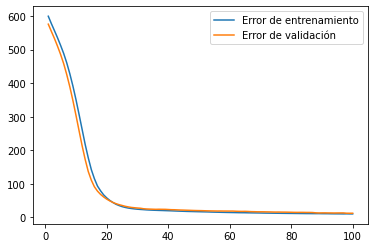

In [14]:
xx = np.arange(1,101,1)

plt.plot(xx,history.history['loss'],label='Error de entrenamiento')
plt.plot(xx,history.history['val_loss'],label='Error de validación')
plt.legend()
plt.show()

In [15]:
mse_nn, mae_nn = model_rg.evaluate(X_test, y_test)

print('MSE: ', mse_nn)

4/4 [==============================] - 0s 2ms/step - loss: 26.7224 - mae: 3.3957
MSE:  26.72237205505371
